<a href="https://colab.research.google.com/github/fatihbe25/bootrainDS/blob/master/09_Assigments%20for%20Regression%20Problems/09_Regression_Problems_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [117]:
data=pd.read_csv("/content/drive/My Drive/DSStudyData/HousePricesTrain.csv",low_memory=False)
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [118]:
target=data["SalePrice"]

numeric_features=[]
categorical_features=[]

for col in data.drop(["SalePrice"],axis=1).columns:
  if data[col].dtype=="object" and data[col].nunique()<10:
    categorical_features.append(col)
  if data[col].dtype in ["int64","float64"]:
    numeric_features.append(col)

numeric_features.remove("Id")

print("Target (Expected, Dependent ) Variable= SalePrice\n\nFeatures (Exploratory, Independent  Variables)\n\nCategorical:\n", categorical_features, '\n\nNumerical:\n', numeric_features)


Target (Expected, Dependent ) Variable= SalePrice

Features (Exploratory, Independent  Variables)

Categorical:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 

Numerical:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'

In [119]:
data_numerical=data[numeric_features]

missing_numerical_by_columns=data_numerical.isnull().sum()
missing_numerical_by_columns[missing_numerical_by_columns>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [120]:
#data_numerical.LotFrontage.sort_values()
imputer=SimpleImputer()
data_numerical=pd.DataFrame(imputer.fit_transform(data_numerical),columns=numeric_features)

In [121]:
missing_numerical_by_columns=data_numerical.isnull().sum()
missing_numerical_by_columns[missing_numerical_by_columns>0]

Series([], dtype: int64)

In [122]:
data_categorical=data[categorical_features]
data_categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,Gable,CompShg,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,Hip,CompShg,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [123]:
def ShowCatMissings():
  missing_categorical_by_columns=data_categorical.isnull().sum()
  missings=pd.DataFrame(missing_categorical_by_columns[missing_categorical_by_columns>0],columns=["miscount"])
  #missings
  missings["mis_per"]=(missings.miscount/data_categorical.shape[0])*100
  print(missings)

ShowCatMissings()

              miscount    mis_per
Alley             1369  93.767123
MasVnrType           8   0.547945
BsmtQual            37   2.534247
BsmtCond            37   2.534247
BsmtExposure        38   2.602740
BsmtFinType1        37   2.534247
BsmtFinType2        38   2.602740
Electrical           1   0.068493
FireplaceQu        690  47.260274
GarageType          81   5.547945
GarageFinish        81   5.547945
GarageQual          81   5.547945
GarageCond          81   5.547945
PoolQC            1453  99.520548
Fence             1179  80.753425
MiscFeature       1406  96.301370


In [124]:
#because Fireplace field numerical we work on all fields and using "data":

fp_exists_fpq_null=data[(data.FireplaceQu.isnull()) & (data.Fireplaces>0) ][["Fireplaces","FireplaceQu"]]

fb_not_exists_fpq_not_null=data[(data.FireplaceQu.isnull()==False) & (data.Fireplaces==0) ][["Fireplaces","FireplaceQu"]]

print(fp_exists_fpq_null.count() + fb_not_exists_fpq_not_null.count())

data.loc[data.FireplaceQu.isnull() ,"FireplaceQu" ] ="NA"
data_categorical=data[categorical_features]

ShowCatMissings()

Fireplaces     0
FireplaceQu    0
dtype: int64
              miscount    mis_per
Alley             1369  93.767123
MasVnrType           8   0.547945
BsmtQual            37   2.534247
BsmtCond            37   2.534247
BsmtExposure        38   2.602740
BsmtFinType1        37   2.534247
BsmtFinType2        38   2.602740
Electrical           1   0.068493
GarageType          81   5.547945
GarageFinish        81   5.547945
GarageQual          81   5.547945
GarageCond          81   5.547945
PoolQC            1453  99.520548
Fence             1179  80.753425
MiscFeature       1406  96.301370


In [125]:
data.loc[data.MasVnrType.isnull() ,"MasVnrType" ] ="None"
ShowCatMissings()

              miscount    mis_per
Alley             1369  93.767123
MasVnrType           8   0.547945
BsmtQual            37   2.534247
BsmtCond            37   2.534247
BsmtExposure        38   2.602740
BsmtFinType1        37   2.534247
BsmtFinType2        38   2.602740
Electrical           1   0.068493
GarageType          81   5.547945
GarageFinish        81   5.547945
GarageQual          81   5.547945
GarageCond          81   5.547945
PoolQC            1453  99.520548
Fence             1179  80.753425
MiscFeature       1406  96.301370


Looking features starting with Bsmt..   we can say these features are for Basement extra information and if no basement exists in a house field contains Nan. I read the data_description.txt and put values for "No Basement" info instead of None.  But some values are 38 some is 37. Exploring the data I saw that 37 house have no basement, for field BsmtExposure 38 means 37 no basement 1 is no exposure.  

In [126]:
data_categorical[data_categorical.BsmtExposure.isnull()][["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]

#data_categorical[data_categorical.BsmtFinType2.isnull()][["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [127]:

#if bsmt exist exposure fintype2 null "No"  else "None"

data.loc[(data.BsmtExposure.isnull() ) & (data.BsmtQual.isnull()==False),"BsmtExposure"]="No"  #no exposure.. 
data.loc[(data.BsmtExposure.isnull() ) & (data.BsmtQual.isnull()),"BsmtExposure"]="NA"  #no basement..  

data.loc[(data.BsmtFinType2.isnull() ) & (data.BsmtQual.isnull()==False),"BsmtFinType2"]="NA"  #no multiple types.. 
data.loc[(data.BsmtFinType2.isnull() ) & (data.BsmtQual.isnull()),"BsmtFinType2"]="NA"  #no basement..  

data.loc[data.BsmtFinType1.isnull() ,"BsmtFinType1"]="NA"
data.loc[data.BsmtCond.isnull() ,"BsmtCond"]="NA"
data.loc[data.BsmtQual.isnull() ,"BsmtQual"]="NA"

data_categorical=data[categorical_features]

ShowCatMissings()

              miscount    mis_per
Alley             1369  93.767123
Electrical           1   0.068493
GarageType          81   5.547945
GarageFinish        81   5.547945
GarageQual          81   5.547945
GarageCond          81   5.547945
PoolQC            1453  99.520548
Fence             1179  80.753425
MiscFeature       1406  96.301370


There is only one row that Electirical  feature is Nan, I explored data but could not find a meaningfull replacement for data value (in bussiness logic). So I put the mostly used value for this Nan value.   

In [128]:

data_categorical[data_categorical.Electrical.isnull()]

data.loc[data.Electrical.isnull(),"Electrical"]= data_categorical.Electrical.value_counts()[0]

data_categorical=data[categorical_features]

ShowCatMissings()

              miscount    mis_per
Alley             1369  93.767123
GarageType          81   5.547945
GarageFinish        81   5.547945
GarageQual          81   5.547945
GarageCond          81   5.547945
PoolQC            1453  99.520548
Fence             1179  80.753425
MiscFeature       1406  96.301370


For the features starting by Garage...   It is absolute that if no garage in house the field is Nan. So I put NA for these NaN values, as written in data_description.txt document.  

In [129]:
for col in data.columns:
  if col.startswith("Garage"):
    data.loc[data[col].isnull(),col]="NA"


data_categorical=data[categorical_features]

ShowCatMissings()


             miscount    mis_per
Alley            1369  93.767123
PoolQC           1453  99.520548
Fence            1179  80.753425
MiscFeature      1406  96.301370


We heve now 4 features with large number of NaN values.  We apply "NA"  as  mentioned in data_definition.txt   ( example => Alley - NA - No Alley access for the house.. ) .. 

To make sure I first checked if already NA values used for these fields. But not used. So we can securly set NA for NaN values.

In [130]:
data[(data.Alley=="NA") | (data.PoolQC=="NA") | (data.Fence=="NA") | (data.MiscFeature=="NA")].shape[0]

0

In [131]:
for col in ["Alley","PoolQC","Fence","MiscFeature"]:
  data.loc[data[col].isnull(),col]="NA"


data_categorical=data[categorical_features]

ShowCatMissings()


Empty DataFrame
Columns: [miscount, mis_per]
Index: []


First I want to look distribution of target variable SalePrice. As we see data is not normaly distributed. Sale prices generally between 100K - 2500K.



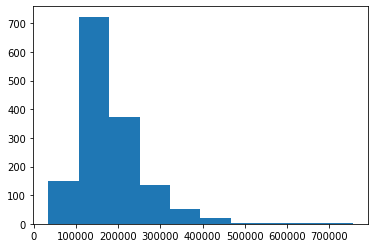

In [132]:

plt.hist(target)
plt.show()

Now I will use One Hot Encoding to convert categorical features to numerical.

In [133]:
encoded_categorical_data=pd.get_dummies(data_categorical,drop_first=True)

encoded_categorical_data.head(2)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,...,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [134]:
data_all_features=pd.merge(data_numerical,encoded_categorical_data,left_index=True,right_index=True)
data_all_features.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [135]:
lrm=linear_model.LinearRegression()
lrm.fit(data_all_features,target)

coefs=lrm.coef_
intrcp=lrm.intercept_

lr_exp="LINEAR REGRESSION FORMULA = SalePrice = " + str(intrcp) + " + "
for col,coef in zip(data_all_features.columns, coefs):
   lr_exp+= "(" + str(coef) + " X " + col + ") + " 

print(lr_exp)

LINEAR REGRESSION FORMULA = SalePrice = -792808.0875661841 + (-33.59688172423178 X MSSubClass) + (67.54036336854392 X LotFrontage) + (0.6606186907932958 X LotArea) + (8649.852441745656 X OverallQual) + (6405.200902690009 X OverallCond) + (273.3708572184168 X YearBuilt) + (56.41398793149051 X YearRemodAdd) + (32.95964000011489 X MasVnrArea) + (16.53720440208781 X BsmtFinSF1) + (14.641935397802513 X BsmtFinSF2) + (-3.960916927461483 X BsmtUnfSF) + (27.218243545956 X TotalBsmtSF) + (20.804319362453953 X 1stFlrSF) + (39.29205013184719 X 2ndFlrSF) + (-30.526557934480024 X LowQualFinSF) + (29.569888193487714 X GrLivArea) + (21.267578785851583 X BsmtFullBath) + (-2776.1178774487626 X BsmtHalfBath) + (2318.013109517713 X FullBath) + (1369.9830814661977 X HalfBath) + (-4957.335375785924 X BedroomAbvGr) + (-18807.929308386163 X KitchenAbvGr) + (1856.6646188341338 X TotRmsAbvGrd) + (5194.588383897946 X Fireplaces) + (-72.19941232202473 X GarageYrBlt) + (3850.515733585791 X GarageCars) + (24.00387

Also using statsmodel library:

In [137]:
data_all_features= sm.add_constant(data_all_features)

model=sm.OLS(target,data_all_features)

results=model.fit()

results.params


const                   -792808.087558
MSSubClass                  -33.596882
LotFrontage                  67.540363
LotArea                       0.660619
OverallQual                8649.852442
                             ...      
SaleCondition_AdjLand      6898.463022
SaleCondition_Alloca       2541.819332
SaleCondition_Family      -1828.052742
SaleCondition_Normal       6073.778657
SaleCondition_Partial      7026.446395
Length: 208, dtype: float64

In [139]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     72.63
Date:                Sat, 03 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:53:05   Log-Likelihood:                -16702.
No. Observations:                1460   AIC:                         3.380e+04
Df Residuals:                    1260   BIC:                         3.486e+04
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.928e+05    1.1e+06     -0.721      0.471   -2.95e+06    1.36e+06
MSSubClass              -33.5969     85.702     -0.392      0.695    -201.731     134.538
LotFrontage              67.5404     45.461      1.486      0.138     -21.646     156.727
LotArea                   0.6606      0.112      5.915      0.000       0.442       0.880
OverallQual            8649.8524   1021.010      8.472      0.000    6646.785    1.07e+04
OverallCond            6405.2009    909.190      7.045      0.000    4621.508    8188.894
YearBuilt               273.3709     72.360      3.778      0.000     131.412     415.330
YearRemodAdd             56.4140     57.852      0.975      0.330     -57.083     169.911
MasVnrArea               32.9596      5.849      5.635      0.000      21.486      44.434
BsmtFinSF1               16.5372      3.016      5.483      0.000      10.620      22.455
BsmtFinSF2               14.6419      6.220      2.354      0.019       2.438      26.845
BsmtUnfSF                -3.9609      2.847     -1.391      0.164      -9.545       1.624
TotalBsmtSF              27.2182      4.162      6.539      0.000      19.053      35.384
1stFlrSF                 20.8043      6.484      3.209      0.001       8.084      33.524
2ndFlrSF                 39.2921      5.650      6.955      0.000      28.208      50.376
LowQualFinSF            -30.5265     14.384     -2.122      0.034     -58.746      -2.307
GrLivArea                29.5699      5.843      5.060      0.000      18.106      41.034
BsmtFullBath             21.2676   2061.846      0.010      0.992   -4023.762    4066.297
BsmtHalfBath          -2776.1179   3122.477     -0.889      0.374   -8901.945    3349.709
FullBath               2318.0131   2228.180      1.040      0.298   -2053.339    6689.366
HalfBath               1369.9831   2157.488      0.635      0.526   -2862.682    5602.648
BedroomAbvGr          -4957.3354   1393.798     -3.557      0.000   -7691.755   -2222.916
KitchenAbvGr          -1.881e+04   5836.158     -3.223      0.001   -3.03e+04   -7358.271
TotRmsAbvGrd           1856.6646    980.921      1.893      0.059     -67.755    3781.084
Fireplaces             5194.5884   2660.688      1.952      0.051     -25.279    1.04e+04
GarageYrBlt             -72.1994     63.155     -1.143      0.253    -196.099      51.700
GarageCars             3850.5157   2339.836      1.646      0.100    -739.887    8440.919
GarageArea               24.0039      7.986      3.006      0.003       8.336      39.672
WoodDeckSF               14.0190      6.102      2.298      0.022       2.049      25.989
OpenPorchSF              -9.7439     11.968     -0.814      0.416     -33.223      13.736
EnclosedPorch            10.8021     12.862      0.840      0.401     -14.432      36.036
3SsnPorch              

We used all features in our model. As a result parameter showing our model performance, RSquared value and AdjectiveRSquared values close to 1 and these two parameters are close to each other. We now examine the pvalues for each features and will remove the features that is not affectively explains the target variable. We will remove the features those has pvalues bigger than 0.5. 

In [150]:
features_to_keep=[]
features_to_remove=[]

for pv,ix in zip(results.pvalues,results.pvalues.index):
  if pv>0.5:
    print(ix + " REMOVE pv=" + str(pv))
    features_to_remove.append(ix)
  else:
    print(ix + " KEEP   pv=" + str(pv))
    features_to_keep.append(ix)

print("KEEP:\n" , features_to_keep)
print("REMOVE:\n" ,features_to_remove)




const KEEP   pv=0.47100657724534234
MSSubClass REMOVE pv=0.6951099525175519
LotFrontage KEEP   pv=0.1376104303721269
LotArea KEEP   pv=4.263052359545055e-09
OverallQual KEEP   pv=6.646612375554693e-17
OverallCond KEEP   pv=3.0448082991826834e-12
YearBuilt KEEP   pv=0.00016550937960308377
YearRemodAdd KEEP   pv=0.3296760673213661
MasVnrArea KEEP   pv=2.1520573340598335e-08
BsmtFinSF1 KEEP   pv=5.0547756778613866e-08
BsmtFinSF2 KEEP   pv=0.018732856477153646
BsmtUnfSF KEEP   pv=0.164327624355026
TotalBsmtSF KEEP   pv=8.949454159491604e-11
1stFlrSF KEEP   pv=0.0013668643012673895
2ndFlrSF KEEP   pv=5.663493681038737e-12
LowQualFinSF KEEP   pv=0.034013584278015166
GrLivArea KEEP   pv=4.803261641708454e-07
BsmtFullBath REMOVE pv=0.9917717400517875
BsmtHalfBath KEEP   pv=0.37413217803297916
FullBath KEEP   pv=0.298392415158684
HalfBath REMOVE pv=0.5255502928263897
BedroomAbvGr KEEP   pv=0.0003894541912315944
KitchenAbvGr KEEP   pv=0.0013025968725638441
TotRmsAbvGrd KEEP   pv=0.05861665975832

In [152]:
data_all_features_only_affective_columns=data_all_features[ features_to_keep]
model2=sm.OLS(target,data_all_features_only_affective_columns)

results2=model2.fit()

results2.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sat, 03 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:36:45   Log-Likelihood:                -16716.
No. Observations:                1460   AIC:                         3.370e+04
Df Residuals:                    1326   BIC:                         3.441e+04
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.151e+06   1.04e+06     -1.107      0.269   -3.19e+06    8.89e+05
LotFrontage            115.1399     39.284      2.931      0.003      38.074     192.206
LotArea                  0.6397      0.102      6.269      0.000       0.440       0.840
OverallQual           8521.1668    971.878      8.768      0.000    6614.580    1.04e+04
OverallCond           6270.9854    807.640      7.765      0.000    4686.594    7855.376
YearBuilt              260.3675     58.766      4.431      0.000     145.082     375.653
YearRemodAdd            45.9745     53.941      0.852      0.394     -59.844     151.793
MasVnrArea              33.7056      5.609      6.009      0.000      22.702      44.709
BsmtFinSF1              16.4537      2.280      7.217      0.000      11.981      20.926
BsmtFinSF2              14.1208      4.030      3.504      0.000       6.214      22.028
BsmtUnfSF               -3.9340      2.201     -1.788      0.074      -8.251       0.383
TotalBsmtSF             26.6405      3.199      8.328      0.000      20.365      32.916
1stFlrSF                18.5757      5.789      3.209      0.001       7.219      29.932
2ndFlrSF                38.7553      5.150      7.525      0.000      28.651      48.859
LowQualFinSF           -26.0766     13.204     -1.975      0.048     -51.979      -0.174
GrLivArea               31.2544      5.201      6.010      0.000      21.052      41.457
BsmtHalfBath         -3082.1320   2819.114     -1.093      0.274   -8612.541    2448.277
FullBath              1241.7164   1914.312      0.649      0.517   -2513.694    4997.127
BedroomAbvGr         -4776.2762   1296.527     -3.684      0.000   -7319.745   -2232.808
KitchenAbvGr         -2.397e+04   3769.204     -6.359      0.000   -3.14e+04   -1.66e+04
TotRmsAbvGrd          2278.5262    925.536      2.462      0.014     462.852    4094.200
Fireplaces            5873.4974   2561.519      2.293      0.022     848.426    1.09e+04
GarageYrBlt            -62.4969     58.605     -1.066      0.286    -177.466      52.472
GarageCars            3360.9522   2230.206      1.507      0.132   -1014.165    7736.070
GarageArea              25.9723      7.556      3.437      0.001      11.149      40.796
WoodDeckSF              14.0150      5.862      2.391      0.017       2.514      25.516
OpenPorchSF             -5.3400     11.138     -0.479      0.632     -27.189      16.509
EnclosedPorch            9.2735     12.128      0.765      0.445     -14.519      33.066
3SsnPorch               32.4747     22.693      1.431      0.153     -12.044      76.993
ScreenPorch             32.3137     12.586      2.567      0.010       7.623      57.004
PoolArea               633.0030    172.924      3.661      0.000     293.769     972.237
MoSold                -179.1603    244.991     -0.731    